In [11]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

from sklearn import *
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix

import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("/data/bank-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


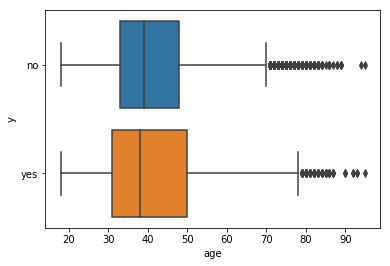

In [25]:
sns.boxplot("age", "y", orient="h", data=df)

In [7]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
df.y.value_counts()/len(df)

no     0.883015
yes    0.116985
Name: y, dtype: float64

train accuracy: 0.902960786172465
test accuracy: 0.9006930109112357
train precision: 0.6648541769649036
test precision: 0.6208530805687204
train recall: 0.35981808453718567
test recall: 0.33784655061250807


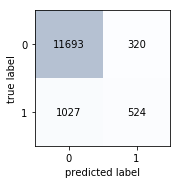

In [17]:
target = "y"
# Feature matrix, does not contain the target var
X = df.drop(columns=[target]) 


# label - dependent variable
y = preprocessing.LabelEncoder().fit_transform(df[target])

# One hot encoding for categorical variables
X_dummy = pd.get_dummies(X, drop_first=True) 

# splitting the data into training and test sets. 
# training dataset - we build the model
# testing dataset - we validate or test the model performance
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_dummy, y
                     , test_size = 0.3 # controls the size of test data ... it a number between 0 and 1
                     , random_state = 1 # reproduce the the randomness
                    )
                    
# Pipeline encapsulates multiple operations 
# Idea is that when you feed data into the pipeline steps 
# are executed in chained fashion
pipe = pipeline.Pipeline([
    # Degree 2, at most power terms of an feature will be 2
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    # alpha: regularization parameter, alpha > 0
    ("est", linear_model.LogisticRegression())
])

# Using fit on pipe will fit invidual steps 
pipe.fit(X_train, y_train)

# Calculate the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

print("train accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("train precision:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("train recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))

train accuracy: 0.9286188264290454
test accuracy: 0.8973754054851076
train precision: 0.7917159763313609
test precision: 0.5743685687558466
train recall: 0.5369181380417335
test recall: 0.39587362991618313


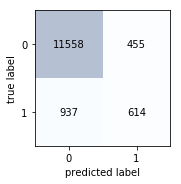

In [27]:
target = "y"
# Feature matrix, does not contain the target var
X = df.drop(columns=[target]) 


# label - dependent variable
y = preprocessing.LabelEncoder().fit_transform(df[target])

# One hot encoding for categorical variables
X_dummy = pd.get_dummies(X, drop_first=True) 

# splitting the data into training and test sets. 
# training dataset - we build the model
# testing dataset - we validate or test the model performance
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_dummy, y
                     , test_size = 0.3 # controls the size of test data ... it a number between 0 and 1
                     , random_state = 1 # reproduce the the randomness
                    )
                    
# Pipeline encapsulates multiple operations 
# Idea is that when you feed data into the pipeline steps 
# are executed in chained fashion
pipe = pipeline.Pipeline([
    # Degree 2, at most power terms of an feature will be 2
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    # alpha: regularization parameter, alpha > 0
    ("est", tree.DecisionTreeClassifier(max_depth=10))
])

# Using fit on pipe will fit invidual steps 
pipe.fit(X_train, y_train)

# Calculate the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

print("train accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("train precision:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("train recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))

train accuracy: 0.9339589850538755
test accuracy: 0.9075493954585668
train precision: 0.8441938178780284
test precision: 0.6519959058341863
train recall: 0.5406634563937934
test recall: 0.41070277240490005


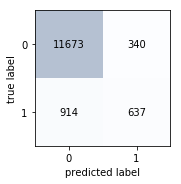

In [38]:
target = "y"
# Feature matrix, does not contain the target var
X = df.drop(columns=[target]) 


# label - dependent variable
# Label encoder convert the categorical value 
# in the target variable with index
y = preprocessing.LabelEncoder().fit_transform(df[target])

# One hot encoding for categorical variables
X_dummy = pd.get_dummies(X, drop_first=True) 

# splitting the data into training and test sets. 
# training dataset - we build the model
# testing dataset - we validate or test the model performance
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X_dummy, y
                     , test_size = 0.3 # controls the size of test data ... it a number between 0 and 1
                     , random_state = 1 # reproduce the the randomness
                    )
                    
# Pipeline encapsulates multiple operations 
# Idea is that when you feed data into the pipeline steps 
# are executed in chained fashion
pipe = pipeline.Pipeline([
    # Degree 2, at most power terms of an feature will be 2
    #("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    #("scaler", preprocessing.StandardScaler()),
    # alpha: regularization parameter, alpha > 0
    ("est", ensemble.RandomForestClassifier(n_estimators=20
                                            , random_state=1
                                            , max_features=0.5
                                            , max_depth=10))
])

# Using fit on pipe will fit invidual steps 
pipe.fit(X_train, y_train)

# Calculate the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

print("train accuracy:", metrics.accuracy_score(y_train, y_train_pred))
print("test accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print("train precision:", metrics.precision_score(y_train, y_train_pred))
print("test precision:", metrics.precision_score(y_test, y_test_pred))

print("train recall:", metrics.recall_score(y_train, y_train_pred))
print("test recall:", metrics.recall_score(y_test, y_test_pred))
